In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
my_data = pd.read_csv("/Users/yifeizhu/Documents/BA501/Week 4-6/python_notebook-master/orders_new.csv")

In [ ]:
my_data.head(5)

In [ ]:

# HW 1: Similarly to PrintDailyTimeSeries() in the sample code, 
# write a Python function called PrintCumulativeTimeSeries().
a=my_data.experiment_id
np.unique(a)

In [ ]:
def GetSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(a == my_id)&(my_data.country==country)]
    series = table.groupby("date")["spend_usd"].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return(series,total_revenue)

In [ ]:
red = GetSeries(my_data,12624548,US)
blue = GetSeries(my_data,12624549,US)

In [ ]:
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()

In [ ]:
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)
    
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "JP")

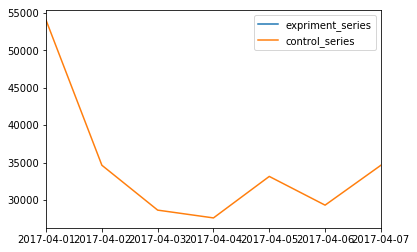

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


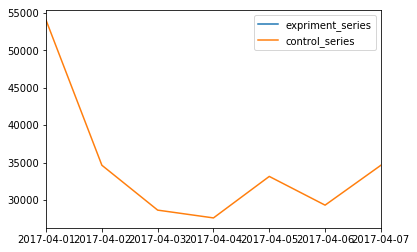